# **Gradient Descent Implementation from Scratch**

#### This notebook demonstrates three different implementations of linear regression using gradient descent:

* Scikit-learn's LinearRegression (Baseline)
* Custom Gradient Descent (GD) for 1D data
* Custom Batch Gradient Descent (BGD) for multi-dimensional data

In [ ]:
!pip install numpy matplotlib sklearn

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## 1. Data Preparation

* Generated synthetic regression data using make_regression with 100 samples and 1 feature.
* Split data into training (80%) and testing sets (20%) using train_test_split.

In [205]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=11)

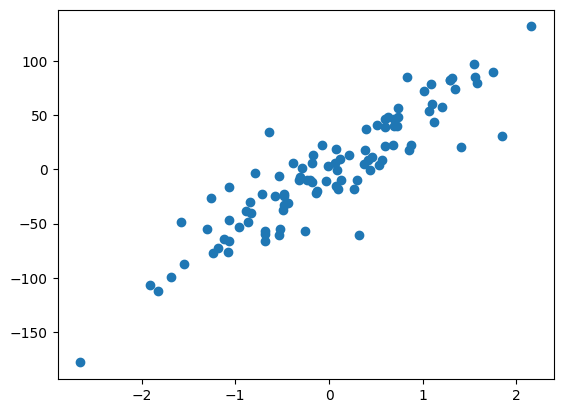

In [206]:
plt.scatter(X,y)

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## 2. Baseline: Scikit-learn Implementation

#### Used as a reference to compare our custom implementations.

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [211]:
lr.intercept_

-4.0550173305458745

In [212]:
lr.coef_

array([54.15886929])

In [213]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([  33.61611873,  -17.66389143, -107.40582118,   50.96726058,
        -61.55193864,   53.7627416 ,  -64.68453169,  -61.76686986,
        -29.8462551 ,   17.34921842,  -89.49032539,  -62.55709351,
         54.85417296,   23.89551059,  -29.82020538,  -19.54840737,
        -72.51581848,   16.81532706,  -38.85617402,   71.91748037])

In [214]:
from sklearn.metrics import r2_score

In [215]:
score_lr = r2_score(y_pred_lr, y_test)
score_lr

0.6694286388904935

### Key Results:
* Slope (Coefficient): **54.16**
* Intercept: **-4.06**
* R² Score: **0.669**

## 3. Custom Gradient Descent (1D Data)

#### Implemented vanilla gradient descent for single-feature data.

#### Class Features:
* Adjustable learning rate (**lr**) and epochs
* Tracks slope (**m**) and intercept (**b**) during training
* Implements prediction method

In [216]:
class GDRegressor:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.m = 100  # Initial slope
        self.b = 100  # Initial intercept

    def fit(self, X_train, y_train):
        # Gradient descent logic
        for i in range(self.epochs):
            slope_b = -2 * np.sum(y_train - self.m*X_train.ravel() - self.b)
            slope_m = -2 * np.sum((y_train - self.m*X_train.ravel() - self.b) * X_train.ravel())

            self.b -= (self.lr*slope_b)
            self.m -= (self.lr*slope_m)

        print(f"Slope is: {self.m}\nIntercept is: {self.b}")

    def predict(self, X_test):
        return (X_test*self.m) + self.b

In [217]:
gd = GDRegressor(0.001, 50)
gd.fit(X_train, y_train)

Slope is: 54.168568283488945
Intercept is: -4.043518806470724


In [218]:
y_pred_gd = gd.predict(X_test)
y_pred_gd

array([[  33.63436356],
       [ -17.65483004],
       [-107.41283115],
       [  50.98861272],
       [ -61.55073691],
       [  53.78459437],
       [ -64.68389096],
       [ -61.76570662],
       [ -29.83937538],
       [  17.3645501 ],
       [ -89.49412698],
       [ -62.55607179],
       [  54.87622119],
       [  23.91201461],
       [ -29.81332099],
       [ -19.53968347],
       [ -72.51658021],
       [  16.83056314],
       [ -38.85090783],
       [  71.94258437]])

In [219]:
score_gd = r2_score(y_pred_gd, y_test)
score_gd

0.6695699705081124

### Key Results:
* Slope: 54.17
* Intercept: -4.04
* R² Score: 0.670 (nearly identical to scikit-learn)

## 4. Batch Gradient Descent (Multi-Dimensional)

#### Extended implementation to handle multiple features using vectorized operations.

#### Key Improvements:
* Uses weight vector (**self.w**) instead of single slope
* Implements proper dot products for matrix operations
* Handles bias term (**w0**) separately

In [220]:
class BGDRegressor:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.w0 = 0  # Bias term
        self.w = None  # Weight vector

    def fit(self, X_train, y_train):
        self.w = np.ones((X_train.shape[1],1))
        y_train = y_train.reshape(-1,1)
        
        for i in range(self.epochs):
            y_hat = self.w0 + np.dot(X_train,self.w)
            error = y_train - y_hat
            
            # Vectorized gradients
            slope_w0 = -2 * np.mean(error)
            slope_w = (-2 * np.dot(X_train.T,error)) / X_train.shape[0]

            self.w0 -= (self.lr * slope_w0)
            self.w -= (self.lr * slope_w)

        print(f"Weight Vector is: {self.w}\nBias is: {self.w0}")

    def predict(self, X_test):
        return self.w0 + np.dot(X_test,self.w)

In [221]:
bgd = BGDRegressor(0.001, 5000)
bgd.fit(X_train, y_train)

Weight Vector is: [[54.14473453]]
Bias is: -4.050107112543151


In [222]:
y_pred_bgd = bgd.predict(X_test)
y_pred_bgd

array([[  33.61119728],
       [ -17.65542948],
       [-107.37393776],
       [  50.9578107 ],
       [ -61.53202248],
       [  53.75256214],
       [ -64.66379797],
       [ -61.7468976 ],
       [ -29.8346137 ],
       [  17.34854241],
       [ -89.46311768],
       [ -62.53691502],
       [  54.84370865],
       [  23.89312608],
       [ -29.80857078],
       [ -19.53945358],
       [ -72.49304089],
       [  16.8147904 ],
       [ -38.84218115],
       [  71.90256276]])

In [223]:
score_bgd = r2_score(y_pred_bgd, y_test)
score_bgd

0.6694099083154432

### Key Results:
* Slope: 54.14
* Intercept: -4.05
* R² Score: 0.669 (nearly identical to scikit-learn)